### Assignment 1: Write an ipython notebook that demonstrates visually in a data-driven way the Central Limit Theorem. 
A skeleton notebook is [here](https://github.com/fedhere/PUI2017_fb55/blob/master/HW3_fb55/Assignment1.ipynb)

- GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), _all with the same population mean_
- Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.    

In [62]:
from collections import defaultdict

import numpy as np

np.random.seed(42)

mean = 42

# tuples of the form (dist, args)
dists = [(np.random.poisson, (mean,)),
         (np.random.binomial,(mean  * 2, .5)),
         (np.random.normal,(mean,)),
         (np.random.chisquare, (mean,)),
         (np.random.gamma, (mean,))]
samples_by_dist = defaultdict(list)
for dist, args in dists:
    for _ in xrange(100):
        N = np.random.randint(11, 2000)
        samples_by_dist[dist.__name__].append(dist(*args, size=N))

- For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 

Populating the interactive namespace from numpy and matplotlib
42.0077976892


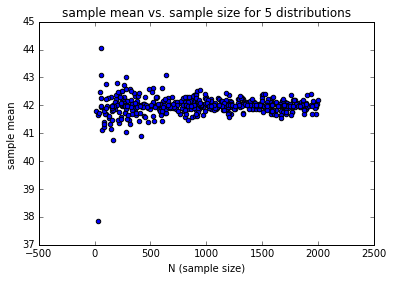

In [107]:
import matplotlib.pylab as pl
%pylab inline

print samples_by_dist['normal'][0].mean()

vals = [(np.mean(d), len(d)) for x in samples_by_dist.itervalues() for d in x]
plt.scatter([v[1] for v in vals], [v[0] for v in vals])
plt.xlabel("N (sample size)")
plt.ylabel("sample mean ")
plt.title("sample mean vs. sample size for 5 distributions")

- Describe the behavior you see in the plots in terms of the law of large numbers.
#### this is also my caption
As N increases, we see that our points become tighter around our chosen mean 42. This is because of the central limit theorem's conclusion about sample means converging as sample size increases.

- PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing

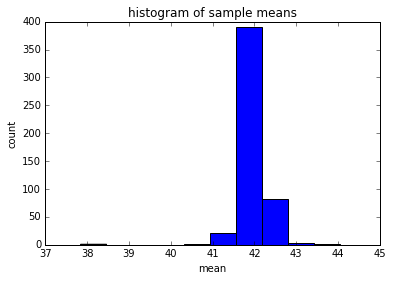

In [124]:
plt.hist([v[0] for v in vals])
plt.xlabel("mean")
plt.ylabel("count")
plt.title("histogram of sample means")

### Caption
We can see visually that this resembles a sample of normally distributed values. Which is exactly what we'd expect from the central limit theorem for our sample means.

__Extra Credit__: FIT a gaussian to the distribution of means    

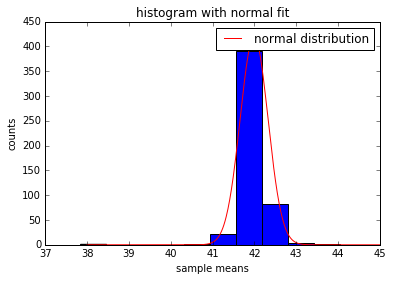

In [127]:
means = np.array([v[0] for v in vals])
std =  means.std(ddof=1) # this is technically sample error
import scipy.stats
plt.hist(means)
x = np.r_[38:45:500j] # i just learned this one the other day!
plt.plot(x, 350. * scipy.stats.norm.pdf(x, loc=means.mean(), scale=std), 'r-', label="normal distribution")
plt.xlabel("sample means")
plt.ylabel("counts")
plt.legend()
plt.title("histogram with normal fit")

### Caption
Using the parameter estimates we fit a normal distribution and see that it is a good fit. This does not prove the central limit theorem but is a strong visual indicator.

### GRADING: 

Your notebook must: 
- generate the distributions, correctly generated for each of the 5 ditributions, all with same mean. ✓
- display all plots: a scatter plot per distribution and a histogram of all distributions, usual rules for plotting applying: visible and readable axes, title, legend, caption. ✓
- each plot must have a caption which describes the plot in terms of Central Limit Theorem ✓ 